In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import highlight_text
from sklearn.linear_model import LinearRegression
import matplotlib.font_manager
from IPython.core.display import HTML

In [80]:
df = pd.read_csv('1995_96 - 2022 Premier league standings.csv', encoding='latin2')


In [81]:
df['GD'] = df['GF'] - df['GA']

In [82]:
y=df.Rk
x=df.GD.values.reshape(-1,1)
model = LinearRegression().fit(x,y)
r_sq = model.score(x,y)
intercept = model.intercept_
slope = model.coef_

In [83]:
y_pred = intercept + slope*x

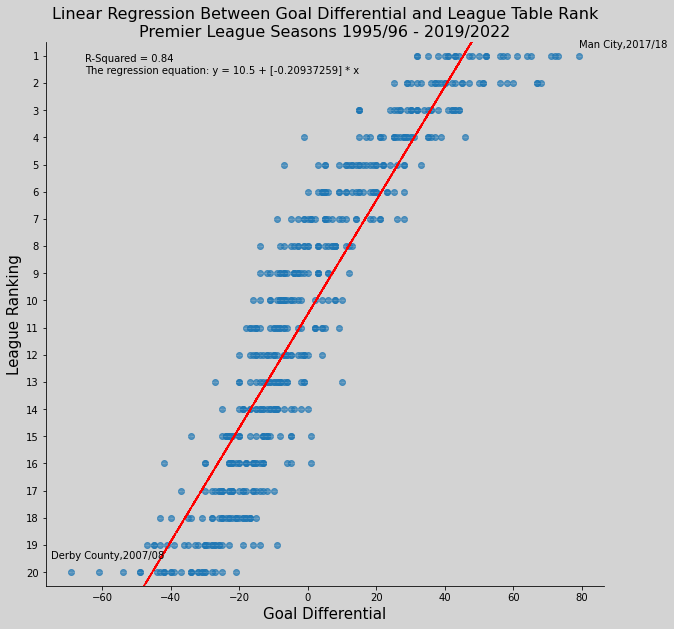

In [84]:
fig,ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('#D3D3D3')
ax.patch.set_facecolor('#D3D3D3')

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','right']
for i in spines:
    if i in spines:
        ax.spines[i].set_visible(False)

#plot data
plt.scatter(x,y,alpha=.7)
plt.plot(x,y_pred,c='red',linestyle='--',dashes=(5,5))


plt.ylim(.5,20.5)
plt.gca().invert_yaxis()
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.xlabel('Goal Differential',fontsize=15,fontname='Osaka')
plt.ylabel('League Ranking',fontsize=15,fontname='Osaka')
plt.title('Linear Regression Between Goal Differential and League Table Rank\nPremier League Seasons 1995/96 - 2019/2022',ha='center',fontsize=16,fontname='Osaka')

#annotate teams
ax.annotate(xy=(79,.7),text='Man City,2017/18')
ax.annotate(xy=(-75,19.5),text='Derby County,2007/08')


#analysis
ax.annotate(xy=(-65,1.65),text=f'R-Squared = {round(r_sq,2)}\nThe regression equation: y = {intercept} + {slope} * x ',fontname='Osaka')
plt.savefig('premline.png',dpi=300,bbox_inches = 'tight',facecolor='#f3edd3')